In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import matplotlib.gridspec as mgrid
import seaborn as sns              # Python Data Visualization Library based on matplotlib

import calendar



The US border crossing dataset contains information of the inbound crossings at the U.S.-Canada and the U.S.-Mexico borders, thus reflecting the number of vehicles, containers, passengers or pedestrians entering the United States

In [2]:
### Plotly for interactive plots
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [3]:
data = pd.read_csv(r'Border_Crossing_Entry_Data.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB
None


In [5]:
data.head()

Port Name       State  Port Code            Border  \
0  Calexico East  California       2507  US-Mexico Border   
1      Van Buren       Maine        108  US-Canada Border   
2      Otay Mesa  California       2506  US-Mexico Border   
3        Nogales     Arizona       2604  US-Mexico Border   
4    Trout River    New York        715  US-Canada Border   

                     Date                      Measure  Value  \
0  03/01/2019 12:00:00 AM                       Trucks  34447   
1  03/01/2019 12:00:00 AM         Rail Containers Full    428   
2  03/01/2019 12:00:00 AM                       Trucks  81217   
3  03/01/2019 12:00:00 AM                       Trains     62   
4  03/01/2019 12:00:00 AM  Personal Vehicle Passengers  16377   

                                Location  
0   POINT (-115.48433000000001 32.67524)  
1             POINT (-67.94271 47.16207)  
2            POINT (-117.05333 32.57333)  
3  POINT (-110.93361 31.340279999999996)  
4   POINT (-73.44253 44.990010000000005)

So it seems that each row consists essentially in a counting (column "Value") for the "crossing method" (column "Measure") such as trucks, trains, etc; together with some geographical information.

convert dates from strings to date format

In [42]:
data['Date'] = pd.to_datetime(data['Date'])

The US has two terrestrial borders, namely with Canada and Mexico. So we expect 2 possible values for 'Border'

In [7]:
borders = data['Border'].unique()
print(borders)

['US-Mexico Border' 'US-Canada Border']


Check unique elements in "Port Code","Port Name" and "Location" coincide

In [8]:
print("There are {} port names.".format(len(data['Port Name'].unique())))
print("There are {} port codes.".format(len(data['Port Code'].unique())))
print("There are {} different locations.".format(len(data['Location'].unique())))

There are 116 port names.
There are 117 port codes.
There are 224 different locations.


In [9]:
ports = data[['Port Name','Port Code']].drop_duplicates()
ports[ports['Port Name'].duplicated(keep = False)]

Port Name  Port Code
29   Eastport       3302
217  Eastport        103

Eastport has two different port codes

In [10]:
data.iloc[[29,217]]

Port Name  State  Port Code            Border       Date Measure  Value  \
29   Eastport  Idaho       3302  US-Canada Border 2019-03-01  Trains    101   
217  Eastport  Maine        103  US-Canada Border 2019-03-01  Trucks    165   

                                 Location  
29   POINT (-116.18027999999998 48.99944)  
217            POINT (-66.99387 44.90357)

In [11]:
# take the port's unique code and location
locs = data[['Port Code','Location']]

# take only unique values
locs = locs.drop_duplicates()
print("There are {} different pairs of port code's and locations".format(len(locs)))
# how many locations has each port?
ls = locs['Port Code'].value_counts()
pts = locs['Location'].value_counts()

There are 229 different pairs of port code's and locations


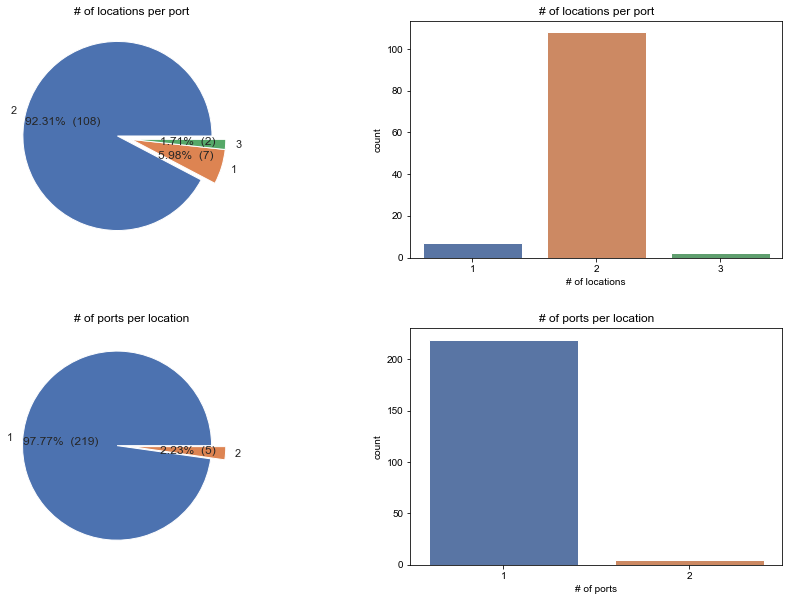

In [12]:
f,ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.set(style = "darkgrid")

# Pie plots
# This function generates autopct, for displaying both the percent value and the original value.
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

ls.value_counts().plot.pie(explode = [0.15,0,0],
                           autopct = make_autopct(ls.value_counts().values),
                           ax = ax[0,0])
ax[0,0].set(title = '# of locations per port', ylabel = '')
pts.value_counts().plot.pie(explode = [0.15,0], 
                            autopct = make_autopct(pts.value_counts().values), 
                            ax = ax[1,0])
ax[1,0].set(title = '# of ports per location', ylabel = '')

# Countplots using seaborn
ax[0,1] = sns.countplot(ls, ax=ax[0,1])
ax[0,1].set(title = '# of locations per port', xlabel = '# of locations')
ax[1,1] = sns.countplot(pts, ax=ax[1][1])
ax[1,1].set(title = '# of ports per location', xlabel = '# of ports')

plt.subplots_adjust(
    wspace =  0.25,     # the amount of width reserved for blank space between subplots
    hspace = 0.3 # the amount of height reserved for white space between subplots
)



The majority of the ports have two locations, and most of the locations are unique to a port, excepting 5 of them.

Which ports are sharing which locations?


In [13]:
rpt = pts[pts.values > 1].index
rpt_locs = locs[locs['Location'].isin(rpt)]
rpt_locs

Port Code                              Location
4            715  POINT (-73.44253 44.990010000000005)
15          3323           POINT (-109.67761 48.54863)
79          3426            POINT (-95.81074 48.77518)
92          3425            POINT (-95.81074 48.77518)
302         3325           POINT (-109.67761 48.54863)
4212         706  POINT (-73.44253 44.990010000000005)
19150       3015        POINT (-117.62999999999998 49)
19267       3020                    POINT (-117.83 49)
22183       3020        POINT (-117.62999999999998 49)
22492       3015                    POINT (-117.83 49)



The following pairs of ports (by codes) are sharing locations. We see that 3020 (Frontier, Washington) and 3015 (Boundary, Washington) actually share 2 locations.


In [14]:
l = rpt_locs.set_index('Location')
pairs = [l.loc[x].values.flatten().tolist() for x in rpt]
print(pairs)

[[3015, 3020], [715, 706], [3020, 3015], [3426, 3425], [3323, 3325]]


In [15]:
# let's one of those shared locations
data.iloc[[19267,22492]]

Port Name       State  Port Code            Border       Date  \
19267  Frontier  Washington       3020  US-Canada Border 2017-03-01   
22492  Boundary  Washington       3015  US-Canada Border 2016-12-01   

                    Measure  Value            Location  
19267           Pedestrians      1  POINT (-117.83 49)  
22492  Rail Containers Full    720  POINT (-117.83 49)



The feature measure indicates the type of counting. Among the 'Measure' types, 'Personal Vehicle Passengers', 'Bus Passengers','Pedestrians' and 'Train Passengers' count people, whereas the others count vehicles.


In [16]:
people = data[data['Measure'].isin(['Personal Vehicle Passengers', 'Bus Passengers','Pedestrians', 'Train Passengers'])]
vehicles = data[data['Measure'].isin(['Trucks', 'Rail Containers Full','Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full'])]

In [17]:
people[['Border','Value']].groupby('Border').sum()

Value
Border                      
US-Canada Border  1631864476
US-Mexico Border  5018273234

In [18]:
people[['Measure','Value']].groupby('Measure').sum()

Value
Measure                                
Bus Passengers                142330871
Pedestrians                  1044218114
Personal Vehicle Passengers  5457391275
Train Passengers                6197450

In [19]:
people[['State','Value']].groupby('State').sum()

Value
State                   
Alaska          10687909
Arizona        664433912
California    1770174503
Idaho           11048350
Maine          138145359
Michigan       428135759
Minnesota       57042654
Montana         32348838
New Mexico      45685789
New York       530521680
North Dakota    37373883
Texas         2537979030
Vermont         68037600
Washington     318522444

In [20]:
# Incoming people by state and type of vehicle
people.pivot_table('Value', index = 'State', columns = 'Measure', aggfunc = 'sum')

Measure       Bus Passengers  Pedestrians  Personal Vehicle Passengers  \
State                                                                    
Alaska               3668090        46029                      5557002   
Arizona              4375091    193379378                    466627956   
California          22686318    398376422                   1349044241   
Idaho                 236285        49832                     10711892   
Maine                1058432      1452920                    135577872   
Michigan            16878527       253245                    410333316   
Minnesota            1434365       520305                     54669078   
Montana               602041       168492                     31537382   
New Mexico            393143      6860216                     38432430   
New York            35144267      8218354                    485498317   
North Dakota         1725192       136869                     35349136   
Texas               40548824    432633524                   2064627838   
Vermont              3621112       255259                     64114298   
Washington           9959184      1867269                    305310517   

Measure       Train Passengers  
State                           
Alaska                 1416788  
Arizona                  51487  
California               67522  
Idaho                    50341  
Maine                    56135  
Michigan                670671  
Minnesota               418906  
Montana                  40923  
New Mexico                   0  
New York               1660742  
North Dakota            162686  
Texas                   168844  
Vermont                  46931  
Washington             1385474

In [21]:
people_crossing_series = people[['Date','Value']].groupby('Date').sum()
people_crossing_series_CAN = people[people['Border'] == 'US-Canada Border'][['Date','Value']].groupby('Date').sum()
people_crossing_series_MEX = people[people['Border'] == 'US-Mexico Border'][['Date','Value']].groupby('Date').sum()

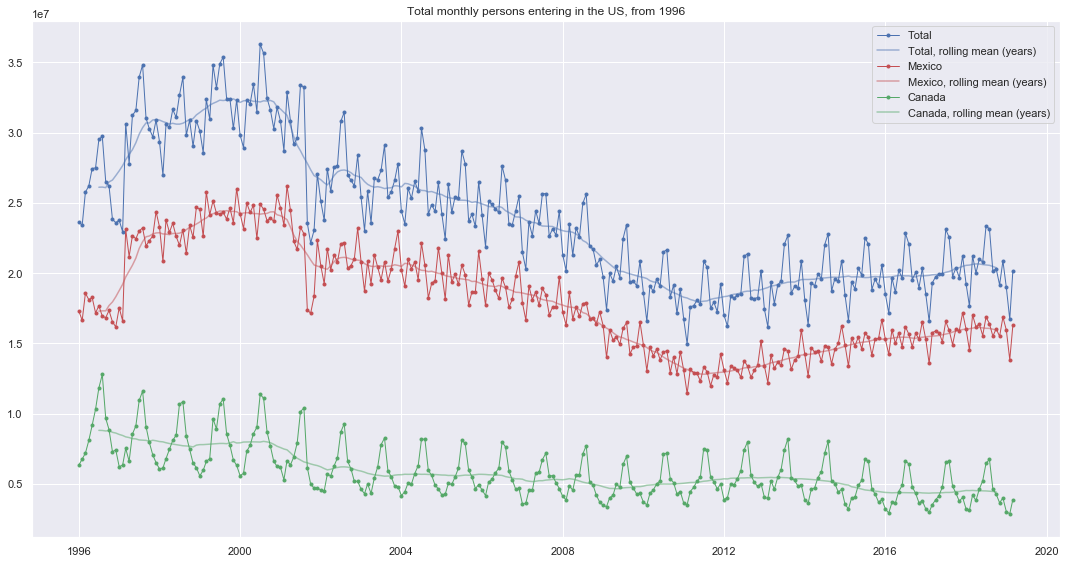

In [22]:
sns.set(rc={'figure.figsize':(15, 8)})
fig, ax = plt.subplots()

#Define a rolling mean, by years
rmean = people_crossing_series.rolling(12, center=True).mean()
rmean_MEX = people_crossing_series_MEX.rolling(12, center=True).mean()
rmean_CAN = people_crossing_series_CAN.rolling(12, center=True).mean()

ax.plot(people_crossing_series,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Total')
ax.plot(rmean,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Total, rolling mean (years)', color = 'b')

ax.plot(people_crossing_series_MEX,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Mexico', color = 'r')
ax.plot(rmean_MEX,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Mexico, rolling mean (years)', color = 'r')

ax.plot(people_crossing_series_CAN,
       marker='.', linestyle='-', linewidth=1, alpha = 1, label='Canada', color = 'g')
ax.plot(rmean_CAN,
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Canada, rolling mean (years)', color = 'g')

ax.set(title = 'Total monthly persons entering in the US, from 1996')
ax.legend()
fig.tight_layout()

In [23]:
people_borders = people[['Border','Value']].groupby('Border').sum()

values = people_borders.values.flatten()
labels = people_borders.index
fig = go.Figure(data=[go.Pie(labels = labels, values=values)])
fig.update(layout_title_text='Total inbound persons, since 1996')
fig.show()

In [24]:


# which years are included in the data?
years = people['Date'].map(lambda x : x.year).unique()



In [25]:
# Take the values and set the date as index
p = people[['Date','Border','Value']].set_index('Date')

# Group by years and border
p = p.groupby([p.index.year, 'Border']).sum()
p.head(10)

Value
Date Border                     
1996 US-Canada Border  105762398
     US-Mexico Border  207586832
1997 US-Canada Border   97570223
     US-Mexico Border  261050472
1998 US-Canada Border   93097261
     US-Mexico Border  274125727
1999 US-Canada Border   94573669
     US-Mexico Border  293109831
2000 US-Canada Border   95776909
     US-Mexico Border  290368364

In [26]:
val_MEX = p.loc(axis=0)[:,'US-Mexico Border'].values.flatten().tolist()
val_CAN = p.loc(axis=0)[:,'US-Canada Border'].values.flatten().tolist()

# Bar chart 
fig = go.Figure(go.Bar(x = years, y = val_MEX, name='US-Mexico Border'))
fig.add_trace(go.Bar(x = years, y = val_CAN, name='US-Canada Border'))

fig.update_layout(title = 'Total inbounds, by years', barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

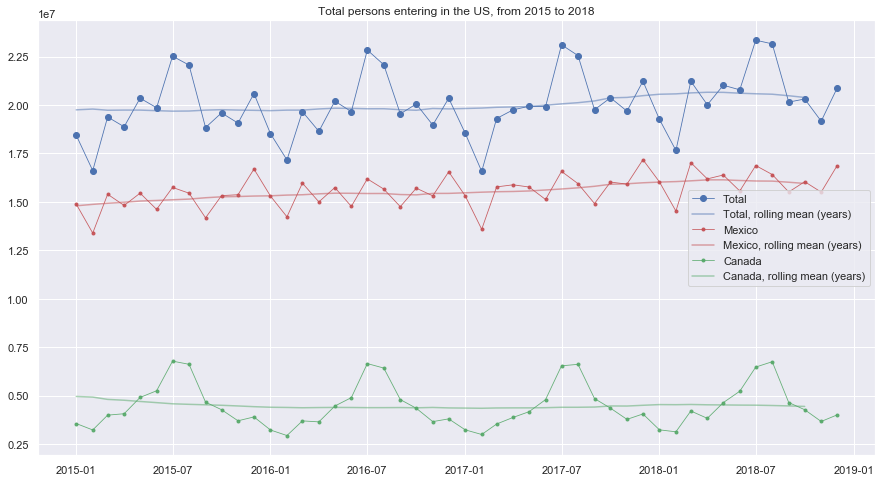

In [27]:
fig, ax = plt.subplots()

start = '2015'
end = '2018'

ax.plot(people_crossing_series.loc[start:end],
       marker='o', linestyle='-', linewidth=0.8, alpha = 1, label='Total', color = 'b')
ax.plot(rmean.loc[start:end],
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Total, rolling mean (years)', color = 'b')

ax.plot(people_crossing_series_MEX.loc[start:end],
       marker='.', linestyle='-', linewidth=0.8, alpha = 0.9, label='Mexico', color = 'r')
ax.plot(rmean_MEX.loc[start:end],
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Mexico, rolling mean (years)', color = 'r')

ax.plot(people_crossing_series_CAN.loc[start:end],
       marker='.', linestyle='-', linewidth=0.8, alpha = 0.9, label='Canada',color = 'g')
ax.plot(rmean_CAN.loc[start:end],
       marker=None, linestyle='-', linewidth=1.5, alpha = 0.5, label='Canada, rolling mean (years)', color = 'g')

ax.set(title = 'Total persons entering in the US, from {} to {}'.format(start, end))
ax.legend()



We can clearly see the seasonal component, with a period of one year. Minimums take place during the winter, notaly in february, whereas the maximums are in summer, during August and Juy. Is this behaviour the same in both borders?


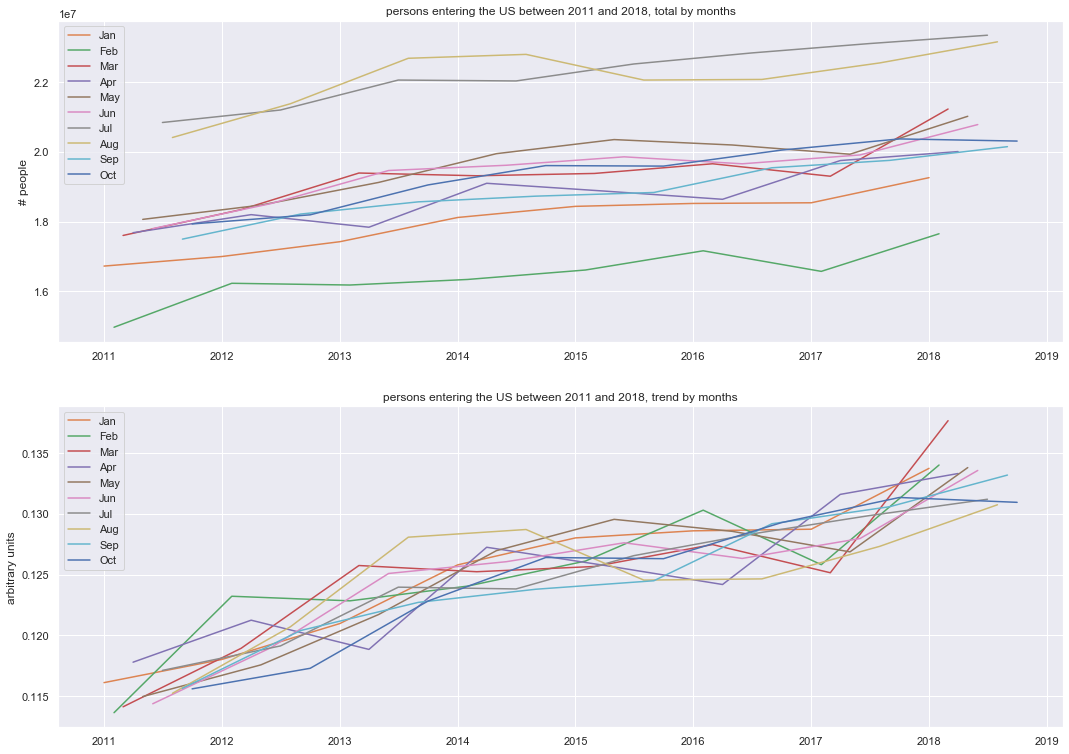

In [28]:
start = '2011'
end = '2018'
pcsm = people_crossing_series.loc[start:end]

fig, ax = plt.subplots(2,figsize = (18,13))

for i in range(11) :
    mm = pcsm[pcsm.index.month == i] 
    ax[0].plot(mm, label = calendar.month_abbr[i])
    ax[1].plot(mm/mm.sum(), label = calendar.month_abbr[i])
    
ax[0].set(title = 'persons entering the US between {} and {}, total by months'.format(start, end),
         ylabel = '# people')
ax[1].set(title = 'persons entering the US between {} and {}, trend by months'.format(start, end),
         ylabel = 'arbitrary units')
ax[0].legend()
ax[1].legend()



Trends look fairly regular and similar for all months


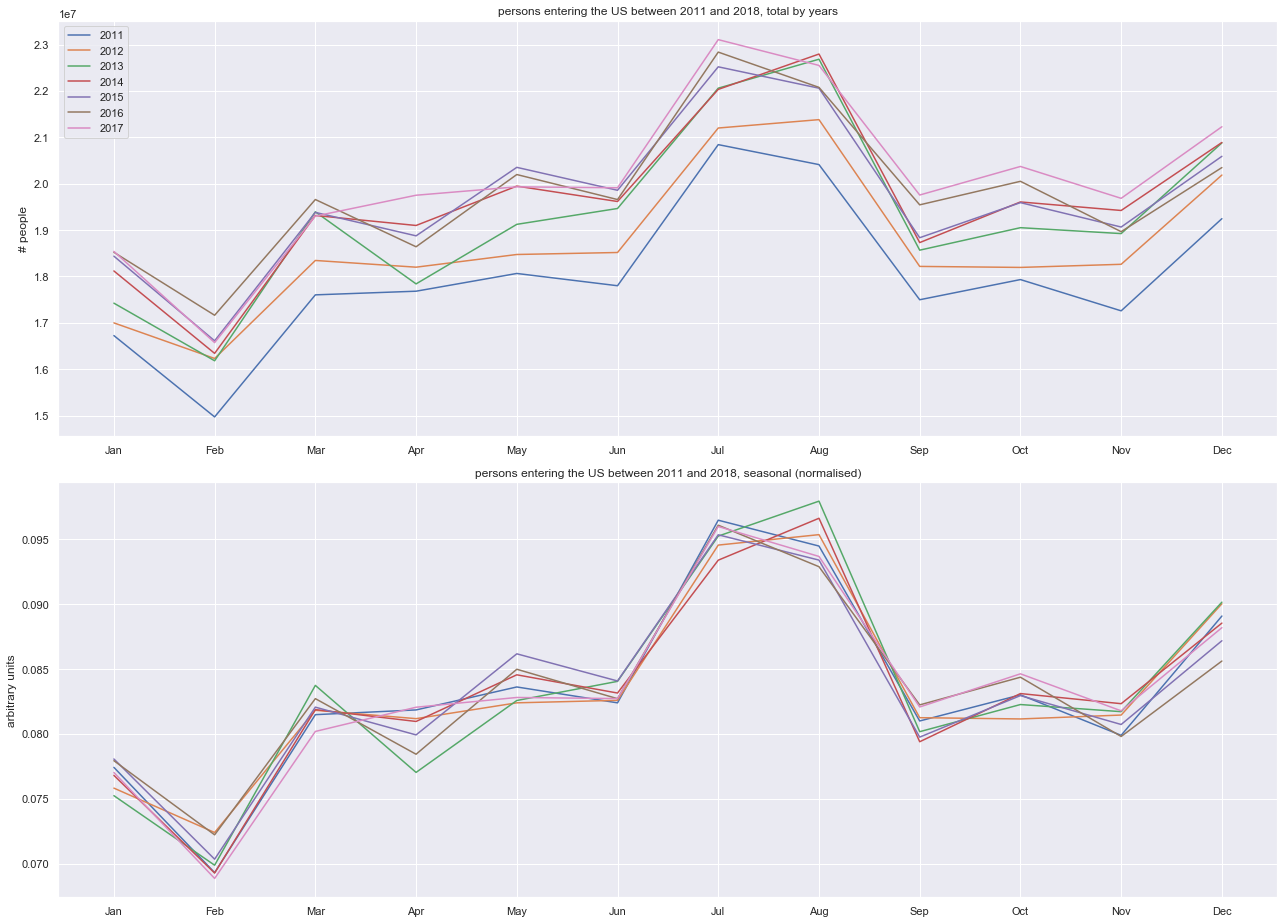

In [29]:
start = '2011'
end = '2018'
pcsm = people_crossing_series.loc[start:end]
months = [calendar.month_abbr[m] for m in range(1,13)]

fig, ax = plt.subplots(2,figsize = (18,13))

start = int(start)
end = int(end)

for i in range(start, end) :
    yy = pcsm[pcsm.index.year == i];
    yy = yy.set_index(yy.index.month);
    ax[0].plot(yy
               , label = i)
    ax[1].plot(yy/yy.sum()
               , label = i)
    
ax[0].set(title = 'persons entering the US between {} and {}, total by years'.format(start, end),
         ylabel = '# people')

ax[1].set(title = 'persons entering the US between {} and {}, seasonal (normalised)'.format(start, end),
         ylabel = 'arbitrary units')

plt.setp(ax, xticks = range(1,13), xticklabels = months)
ax[0].legend()
plt.tight_layout()